In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display
import time

In [170]:
class InvertedPendulum:

    def __init__(self):
        # Dynamics constants
        self.gravity   = 9.8
        self.masscart  = 1.0
        self.masspole  = 0.1
        self.length    = 5   
        self.epsilon   = self.masspole/(self.masspole+self.masscart )

    def ode(self, state, control):
        """Continuous-time dynamics of an inverted pendulum expressed as an ODE."""
        x, v, theta, omega = state
        f = control
        return np.array([
            v,
            -self.epsilon * theta + f,
            omega,
            theta - f,
        ])

    def discrete_step(self, state, control, dt):
        """Discrete-time dynamics (Euler-integrated) of an inverted pendulum."""
        x, v, theta, omega = state
        return state + dt * self.ode(state, control)

In [182]:
def plot_traj(state_sequence): 
    """Input a N*4*1 matrix, will prinit trajectory as an animation"""
    N = len(state_sequence)

    for i in range(N):
        # pole
        plt.scatter(state_sequence[i,0]+5*np.sin(state_sequence[i,2]),5*np.cos(state_sequence[i,2]),marker='o')
        # cart
        plt.scatter(state_sequence[i,0],0,marker='o')
        
        plt.xlim([-10, 10])
        plt.ylim([-10, 10])
        IPython.display.clear_output(wait=True)
        display(plt.gcf())
        time.sleep(0.01)
        plt.clf()  # Clear the current figure

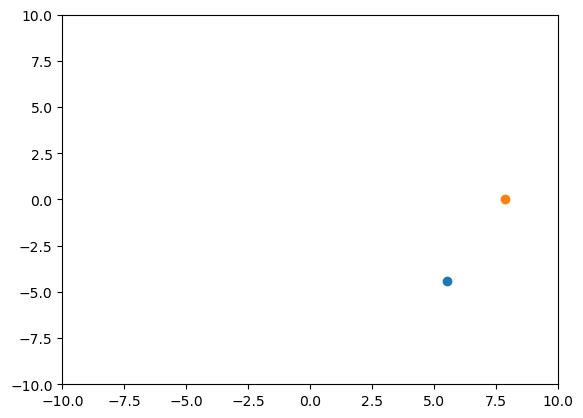

<Figure size 640x480 with 0 Axes>

In [183]:
car = InvertedPendulum()
N = 50
dt = 0.1

# control input
u = np.ones(N) 
for i in range(N):
    if (i%2 !=0):
        u[i] = 1+i
    else:
        u[i] = -1-i

# initial state
x0 = np.array([0,0,-np.pi/2,0]) 

state = np.zeros((N+1,4))
state[0] = x0
for i in range(N):
    state[i+1] = car.discrete_step(state[i],u[i],dt)

plot_traj(state)
